<a href="https://colab.research.google.com/github/sebcalcagno/AnalisisSeriesTemporales/blob/main/CLASE_2/AST_Clase_2_ejercicio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales</h1>
    <h3>Clase 2</h3>
    <h3>Ejercicio 4</h3>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno / Fernando Martínez<p> 
</div>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from scipy.stats.distributions import chi2


matplotlib.rcParams['figure.figsize']=[12.0,8.0] 
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url='https://raw.githubusercontent.com/sebcalcagno/AnalisisSeriesTemporales/main/Indice_precios.csv'
data = pd.read_csv(url)
data.fecha = pd.to_datetime(data.fecha, dayfirst = True) 
data.set_index("fecha", inplace=True)
data=data.asfreq('m')

In [ ]:
data.head()

,IPC
fecha,
2017-01-31,1.3
2017-02-28,2.5
2017-03-31,2.4
2017-04-30,2.6
2017-05-31,1.3


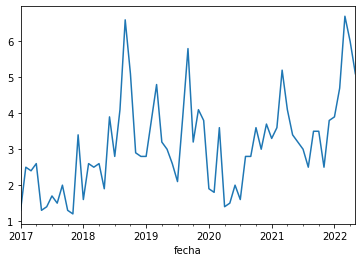

In [ ]:
data.IPC.plot()

In [ ]:
# defino diferentes variables para realizar analisis

T = data.IPC.shape[0]  # número de datos
M = 7   # máximo número de rezagos que elijo 
rezagos = np.arange(1, M+1)
alpha = 0.05  # significancia de los test

Calculamos las autocorrelaciones. Esto lo hacemos gracias al modulo "Time Series Analysis" / Funcion Autocorrelaciones.
Conservamos desde el elemento 1 en adelante

In [ ]:
rho = sm.tsa.acf(data.IPC, fft=True, nlags=M)[1:] 
rho
# Aqui vemos si los numeros son grandes o pequeños. 
# Si son grandes es evidencia en contra de que los rezagos son ruido blanco ( si son pequeños es una evidencia, a favor del ruido blanco).

array([0.58605889, 0.36544647, 0.2902482 , 0.12375532, 0.10979953,
       0.22352401, 0.03893009])

Calculamos el estadistico de Box-Pierce para todos los rezagos desde el 1 hasta el 7

In [ ]:
Qstar = T * (rho ** 2).cumsum()

Calculamos el estadistico de Ljung-Box

In [ ]:
Q = T * (T+2) * ((rho ** 2)/(T-rezagos)).cumsum()

Calculamos los valores criticos

In [ ]:
vcrits = np.array([chi2(k).ppf(1-alpha) for k in rezagos])

Calculamos la autocorrelacion parcial

In [ ]:
rhop = sm.tsa.pacf(data.IPC, nlags=M, method='ols')[1:]

In [ ]:
resumen = pd.DataFrame({'AC':rho, 'PAC': rhop, 'Box-Pierce':Qstar, '* Ljung-Box':Q, 'Valores criticos': vcrits}, index=rezagos)
resumen.index.name = 'Rezagos'

resumen.round(4)

,AC,PAC,Box-Pierce,* Ljung-Box,Valores criticos
Rezagos,,,,,
1,0.5861,0.6088,22.3252,23.3717,3.8415
2,0.3654,0.0658,31.0060,32.6037,5.9915
3,0.2902,0.1745,36.4819,38.5212,7.8147
4,0.1238,-0.1571,37.4774,39.6146,9.4877
5,0.1098,0.1450,38.2610,40.4896,11.0705
6,0.2235,0.2643,41.5086,44.1776,12.5916
7,0.0389,-0.3119,41.6072,44.2914,14.0671


Aqui analizamos si los rezagos son o no son ruido blanco. <br>
Los test nos nuestran que no hay evidencia empirica para determinar que hay ruido blanco en los rezagos.<br>
Concluyo que esta serie no es ruido blanco.<br>

GRACIAS POR SU ATENCION ! 💻